<a href="https://colab.research.google.com/github/taavip/MAPlaneeringud/blob/main/plan_analyys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (942 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%

In [4]:
pip install owslib

     |████████████████████████████████| 216 kB 4.3 MB/s 


In [20]:
import pandas as pd
import sklearn
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://gsavalik.envir.ee/geoserver/planeeringud/ows?service=WFS"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layers = list(wfs.contents)
layer = layers[3]

# Specify the parameters for fetching the data
params = dict(service='WFS', version="1.1.0", request='GetFeature',
      typeName=layer, outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url

# Read data from URL
data = gpd.read_file(q)

In [9]:
layers

['planeeringud:detail_plan_juurdep',
 'planeeringud:detail_plan_sund',
 'planeeringud:detail_plan_avalik',
 'planeeringud:detail_plan_ala',
 'planeeringud:detail_plan_haljastus',
 'planeeringud:detail_plan_hoonestus',
 'planeeringud:detail_plan_kktingimus',
 'planeeringud:detail_plan_krunt',
 'planeeringud:detail_plan_kuja',
 'planeeringud:detail_plan_maapar',
 'planeeringud:detail_plan_rajatis',
 'planeeringud:detail_plan_servituut',
 'planeeringud:detail_plan_transp',
 'planeeringud:detail_plan_tehno',
 'planeeringud:detail_plan_tingimus',
 'planeeringud:detail_plan_valveplaan',
 'planeeringud:detail_plan_valveplaan_osa',
 'planeeringud:ehak_tiheasustus',
 'planeeringud:rb_planeeringutrass',
 'planeeringud:yld_plan_vaartvaade',
 'planeeringud:yld_plan_ala',
 'planeeringud:yld_plan_juurdep',
 'planeeringud:detail_plan_koko',
 'planeeringud:yld_plan_jaade',
 'planeeringud:yld_plan_kktingimus',
 'planeeringud:yld_plan_maakas',
 'planeeringud:yld_plan_vaartmiljoo',
 'planeeringud:yld_pla

In [11]:
data

,id,sys_id,planid,dp_kiht,oid,okood,plannim,planliik,planliik_vaste,planeesm,planseis,planseis_vaste,algatkp,vastuvkp,kehtestkp,planksh,planviide,muutkp,muutnr,seos_ma,arhiiv_digi,avalik,plan_kihid,yp_muutev,allikas,stamp_upd,geometry
0,detail_plan_ala.0,21349,86552,DP_plan_ala,9,622.0,Põlva linnas perspektiivse Kaasiku tn 9 maaüks...,30,Detailplaneering,Perspektiivsele Kaasiku tn 9 maaüksusele eriv...,10,Planeering on kehtiv,2020-05-06,2020-11-11,2021-01-27,None,http://delta.andmevara.ee/polva2014_vald/dokum...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-08-17,"MULTILINESTRING ((405637.830 6453995.890, 4056..."
1,detail_plan_ala.1,21350,15786,DP_plan_ala,3,784.0,"Asula tn 6d, 8a, 8b, 14, 14a, 14b, 16c ja 16d ...",30,Detailplaneering,None,15,Planeering on osaliselt kehtiv või osa planeer...,2005-11-02,2010-09-29,2020-11-26,None,https://tpr.tallinn.ee/Link/Proceeding/DP020420,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-08-17,"MULTILINESTRING ((728955.000 6599304.019, 7289..."
2,detail_plan_ala.2,21351,68127,DP_plan_ala,20,725.0,Kinnistu Uuetalu I detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on elamukrunti...,10,Planeering on kehtiv,2001-04-19,None,2002-06-27,None,None,None,None,seos Maa-ametiga puudub,None,jah,digiteeritud pilootprojekti käigus,None,MA sisestatud,2021-08-17,"POLYGON ((532432.710 6574761.520, 532422.860 6..."
3,detail_plan_ala.3,21352,94474,DP_plan_ala,20,432.0,Luunja vallas Rõõmu külas Uus Teearu (43201:00...,30,Detailplaneering,Üksikelamute ehitamine,10,Planeering on kehtiv,2019-11-28,2021-01-28,2021-04-21,None,https://atp.amphora.ee/luunjavv/index.aspx?it...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-08-17,"POLYGON ((531739.900 6579651.330, 531738.210 6..."
4,detail_plan_ala.4,21353,51227,DP_plan_ala,16,725.0,Nissi tee 24a detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärgiks on kinnistu jagam...,10,Planeering on kehtiv,2016-11-21,None,2017-12-13,None,None,None,None,seos Maa-ametiga puudub,None,jah,digiteeritud pilootprojekti käigus,None,MA sisestatud,2021-08-17,"POLYGON ((529459.550 6580755.884, 529541.414 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,detail_plan_ala.315,21664,14770,DP_plan_ala,3,NaN,VIRU VÄLJAKU DETAILPLANEERING,30,Detailplaneering,Viru väljakul kruntide moodustamine ja neile ä...,10,Planeering on kehtiv,None,None,1999-05-06,ei,"<a target=""_blank"" href=https://tpr.tallinn.ee...",None,None,None,None,jah,taasdigiteeritud hindamise jaoks,ei,Digitaliseeritud,2021-08-25,"POLYGON ((542728.030 6588999.680, 542735.280 6..."
316,detail_plan_ala.316,21665,14803,DP_plan_ala,None,NaN,"LIIVALAIA, MAAKRI JA KIVISILLA TÄNAVATE NING T...",30,Detailplaneering,0,10,Planeering on kehtiv,None,None,1994-05-05,ei,"<a target=""_blank"" href=https://tpr.tallinn.ee...",None,None,None,None,jah,taasdigiteeritud hindamise jaoks,ei,Digitaliseeritud,2021-08-25,"POLYGON ((543119.790 6588659.300, 543076.410 6..."
317,detail_plan_ala.317,21666,96633,DP_plan_ala,58,NaN,Posti tn 57 katastriüksuse detailplaneering,30,Detailplaneering,Detailplaneeringu eesmärk on krundi ehitusõigu...,10,Planeering on kehtiv,2021-03-02,2021-06-08,2021-07-20,None,https://www.viljandivald.ee/detailplaneeringud...,None,None,Maa-ameti digiarhiivi esitatud,arhiveeritud ja digiteeritud,jah,digiteeritud ja esitatud kehtestamisel,None,MA sisestatud,2021-09-14,"POLYGON ((609888.050 6456419.210, 609911.940 6..."
318,detail_plan_ala.318,21667,95492,DP_plan_ala,17,NaN,"HARJUMAA, HARKU VALD, RANNAMÕISA KÜLA\nTÄNAVAO...",30,Detailplaneering,Detailplaneeringu koostamise eesmärgiks on sel...,10,Planeering on kehtiv,2016-04-28,None,2021-06-28,ei,https://kaart.harku.ee/DP/160216

In [12]:
data["vastuvkp"] = data["vastuvkp"].astype("datetime64")

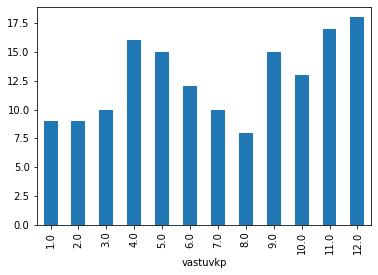

In [14]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.month).count().plot(kind="bar")

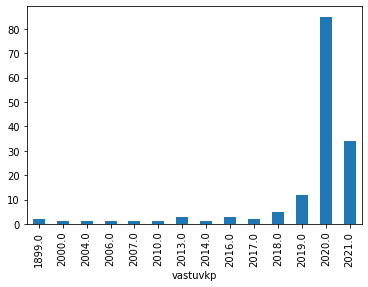

In [15]:
data["vastuvkp"].groupby(data["vastuvkp"].dt.year).count().plot(kind="bar")

In [23]:
pd.unique(data["vastuvkp"])

array(['2020-11-11', '2010-09-29', None, '2021-01-28', '2006-03-27',
       '2020-12-22', '2021-04-07', '2020-02-25', '2000-06-15',
       '2017-01-04', '2020-08-18', '2020-07-07', '2020-09-18',
       '2019-12-18', '2019-11-12', '2020-06-04', '2020-11-12',
       '2020-03-16', '2020-10-07', '2020-09-08', '2020-09-22',
       '2020-06-29', '2020-04-30', '2019-07-31', '2020-11-26',
       '2020-07-23', '2020-05-26', '2020-02-20', '2020-09-24',
       '2019-10-31', '2020-07-29', '2020-08-11', '2020-08-27',
       '2020-07-22', '2020-03-23', '2020-02-10', '2020-08-28',
       '2019-02-05', '2020-09-21', '2020-07-20', '2020-09-14',
       '2020-09-17', '2020-06-08', '2020-04-29', '2020-05-28',
       '2020-10-14', '2020-10-26', '2020-10-19', '2020-11-17',
       '2018-08-22', '2020-04-07', '2018-11-29', '2020-12-31',
       '2018-12-18', '2020-11-10', '2020-11-30', '2019-05-21',
       '2020-12-17', '2018-12-27', '2020-12-10', '2020-10-27',
       '2020-11-09', '2020-12-08', '2020-12-30', 

In [ ]:
*